In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


### Game Result

In [4]:
path = '../../Project/Assets/Log/rl_robust/skill1'
print(os.getcwd())
log_list = os.listdir(path)
player_win_list = []
enemy_win_list = []

for seed, folder in enumerate(log_list):
    if (not 'run1' in folder):
        continue
    print(folder)
    file_path = os.path.join(path, folder+'/gameresult_log.csv')
    game_log = pd.read_csv(file_path, header=None)
    total_length = len(game_log[1])

    player_win = [result for result in game_log[1] if result == "PlayerWin"]
    enemy_win = [result for result in game_log[1] if result == "EnemyWin"]

    player_win_list.append(len(player_win)/total_length)
    enemy_win_list.append(len(enemy_win)/total_length)

    print("seed : {}, player_win : {}%, enemy_win : {}%".format(seed, round(len(player_win)/total_length, 3) * 100, round(len(enemy_win)/total_length, 3) * 100))

print("mean : {}%, std : {}%".format(round(np.mean(player_win_list),3) * 100, round(np.std(enemy_win_list),3) * 100))

D:\PycharmProjects\cilab_ct_game\MMORPG-UNITY\Experiment\MA
range5_run1
seed : 0, player_win : 46.400000000000006%, enemy_win : 53.6%
skill1_range19_run1
seed : 5, player_win : 66.8%, enemy_win : 33.2%
skill1_range20_run1
seed : 10, player_win : 65.60000000000001%, enemy_win : 34.4%
skill1_range3_run1
seed : 15, player_win : 0.0%, enemy_win : 100.0%
skill1_range4_run1
seed : 20, player_win : 21.8%, enemy_win : 78.2%
mean : 40.1%, std : 25.900000000000002%


### Calculate the Generalization Gap

In [96]:
populations = dict(range3=[0.39, 0.048], range4=[0.44, 0.016], range5=[0.45, 0.027], 
                   range19=[0.992, 0.007], range20=[0.995, 0.003])

path = '../../Project/Assets/Log/rule_based'
print(os.getcwd())
seeds = ['seed1', 'seed2', 'seed3', 'seed4', 'seed5']
log_list = os.listdir(path)

scores = {k:[] for k in populations.keys()}
p_tr_mu, p_tr_std = populations['range5']
for seed in seeds:
    for k in populations.keys():
        player_win_list = []
        enemy_win_list = []
        test_path = os.path.join(path, k, seed)
        file_path = os.path.join(test_path, 'gameresult_log.csv')
        game_log = pd.read_csv(file_path, header=None)
        total_length = len(game_log[1])

        player_win = [result for result in game_log[1] if result == "PlayerWin"]
        enemy_win = [result for result in game_log[1] if result == "EnemyWin"]

        player_win_list.append(len(player_win)/total_length)
        enemy_win_list.append(len(enemy_win)/total_length)
        
        p_te_mu, p_te_std = populations[k]
        test_performance = (sum(player_win_list) / p_te_mu)
        scores[k].append(test_performance)
        print(k, test_performance)
vs = []
for k, v in scores.items():
    print('{} mean : {}%, std : {}%'.format(k,round(np.mean(v),3), round(np.std(v),3)))
    vs.append(v)
    if k != 'range5':
        vs.append(v)
print('Total Percentage', round(np.mean(vs),3), round(np.std(vs),3))

D:\PycharmProjects\cilab_ct_game\MMORPG-UNITY\Experiment\MA
range3 0.015384615384615384
range4 0.09999999999999999
range5 0.26038437693738375
range19 0.8931451612903226
range20 0.8703517587939699
range3 0.005128205128205128
range4 0.13636363636363635
range5 0.14666666666666667
range19 0.8830645161290323
range20 0.8904522613065327
range3 0.020512820512820513
range4 0.11818181818181818
range5 0.19999999999999998
range19 0.8991935483870968
range20 0.8804020100502513
range3 0.020512820512820513
range4 0.12272727272727273
range5 0.17333333333333334
range19 0.8729838709677419
range20 0.828140703517588
range3 0.005128205128205128
range4 0.09545454545454546
range5 0.21333333333333332
range19 0.9032258064516129
range20 0.8683417085427135
range3 mean : 0.013%, std : 0.007%
range4 mean : 0.115%, std : 0.015%
range5 mean : 0.199%, std : 0.038%
range19 mean : 0.89%, std : 0.011%
range20 mean : 0.868%, std : 0.021%
Total Percentage 0.441 0.396


### Visulaize Trajectory

D:\PycharmProjects\cilab_ct_game\MMORPG-UNITY\Experiment\MA


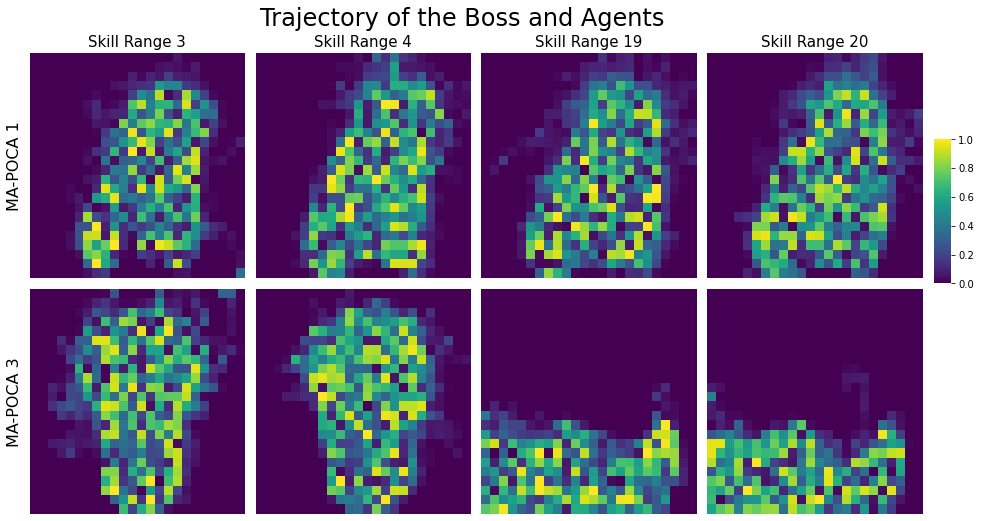

In [82]:
path = '../../Project/Assets/Log/rl_robust/'
models = ['skill1', 'skill3']
print(os.getcwd())
skill_range = [3, 4, 19 ,20]
num_hm = 2
fig, axs = plt.subplots(ncols=4, nrows=num_hm, figsize=(num_hm ** 4, num_hm ** 3, ))
fig.suptitle('Trajectory of the Boss and Agents', fontsize=num_hm**3 * 3)
cbar_ax1 = fig.add_axes([.91, .5, .015, .25])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.05, hspace=0.05)
for m, model in enumerate(models):
    for i, skill in enumerate(skill_range):
        if i > 0:
            cbar=False
        csv_path = 'range{}/seed1/movement_log.csv'.format(skill)
        df = pd.read_csv(os.path.join(base_dir1, model, csv_path), header=None)
        df.rename(columns={0: 'episode', 1: 'agent', 2: 'cnt', 3: 'X', 4: 'Y', 5: 'Z'}, inplace=True)
        agents = df[df['agent']!='Boss']
        datas = [agents, boss]
        names = models
        canvases = []
        for j, data in enumerate(datas):
            dx = data['X'] + 12
            dy = data['Z'] + 12
            canvas = np.zeros((24, 24),dtype=np.uint8)
            for x,y in zip(dx, dy):
                canvas[23 - int(y), int(x)] += 1
            canvas = (canvas-np.min(canvas))/(np.max(canvas)-np.min(canvas))
            canvases.append(canvas)
        axs[0, i].set_title('Skill Range {}'.format(skill), fontsize=15)
        row0 = sns.heatmap(canvases[0],cmap="viridis",alpha = 1, ax=axs[m, i], annot=False,
                    cbar= i == 3, cbar_ax=None if i!=3 else cbar_ax1,
                    yticklabels=False, xticklabels=False)
        if i == 0:
            row0.set_ylabel(ylabel='MA-POCA {}'.format(model[-1]), fontsize=16)
fig.savefig('heatmap.pdf', dpi=400,bbox_inches='tight')
#fig.tight_layout()

### Drawing Trained Plot

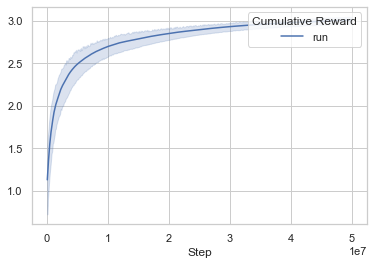

In [9]:
base_dir = '../../Project/Assets/Log/csv'
csv_files = os.listdir(base_dir)
is_indiv_first = False
is_group_first = False
for csv_file in csv_files:
    if 'meta' in csv_file:
        continue
    df = pd.read_csv(os.path.join(base_dir, csv_file))
    df = df.drop(['Wall time'], axis=1)
    if 'Group' not in csv_file:
        df = df.rename(columns={'Value':csv_file[11:14]})
        if not is_indiv_first:
            indiv_df = df
            is_indiv_first = True
        else:
            indiv_df = pd.concat([indiv_df, df[csv_file[11:14]]], axis=1)
indiv_df = indiv_df.dropna()

sns.set()
sns.set_style('whitegrid')
#fig, ax = plt.subplots()
sns.lineplot(indiv_df.set_index(keys='Step').ewm(span = 3600).mean())

#ax.set_xlim(0, 20000)
#plt.xticks([0, 5000, 10000, 15000, 20000])
#ax.set_xlabel('Step')
#ax.set_ylabel('Rewards')
plt.legend(loc='upper right', title='Cumulative Reward')
#plt.savefig("myImagePDF3.pdf", format="pdf", bbox_inches="tight")

### Making bar plot

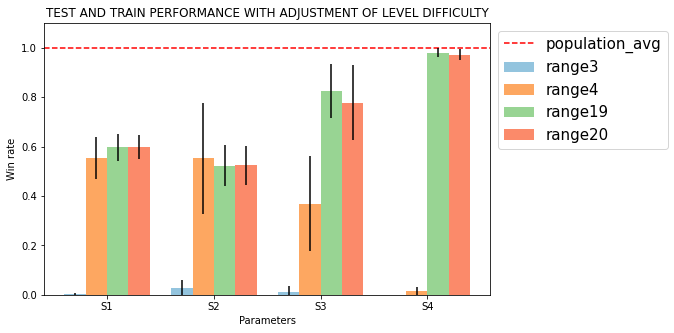

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))

# 주어진 X 레이블과 Y 값
x_labels = ['S1', 'S2', 'S3', 'S4']
y_values = np.array([
    [0.004, 0.553, 0.597, 0.597],  # Y 값 1
    [0.028, 0.553, 0.523, 0.525],  # Y 값 2
    [0.013, 0.369, 0.826, 0.778],  # Y 값 3
    [0.000, 0.016, 0.980, 0.971],   # Y 값 4
    #[1.8, 2.1, 2.3, 2.0],   # Y 값 4
])

std = np.array([
    [0.005, 0.033, 0.024, 0.000],  # Y 값 1
    [0.085, 0.224, 0.192, 0.015],  # Y 값 2
    [0.055, 0.082, 0.109, 0.017],  # Y 값 3
    [0.048, 0.079, 0.151, 0.022],   # Y 값 4
    #[1.8, 2.1, 2.3, 2.0],   # Y 값 4
])
# 수평선 그리기
plt.axhline(y=1, color='r', linestyle='--')

# 막대 그래프 그리기
bar_width = 0.2
index = np.arange(len(x_labels))
colors = ['#93C4DE', '#FDA761', '#98D493', '#FB8A6A']
for i in range(y_values.shape[1]):
    plt.bar(index + (i * bar_width), y_values[:, i], bar_width, yerr=std[i], color=colors[i], alpha=1)

# 차트 제목과 축 레이블 설정
plt.title('TEST AND TRAIN PERFORMANCE WITH ADJUSTMENT OF LEVEL DIFFICULTY')
plt.xlabel('Parameters')
plt.ylabel('Win rate')
plt.ylim(0, 1.1)

# X 축 레이블 설정
plt.xticks(index + bar_width * (y_values.shape[1] - 1) / 2, x_labels)

# 범례 설정
plt.legend(['population_avg','range3', 'range4', 'range19', 'range20'], loc='upper left',
           fontsize = 15, bbox_to_anchor=(1, 1))

# 그래프 표시
plt.show()